In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv("C:/Users/Tas/Desktop/progs/data/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [42]:
left = df[df.left==1]
left.shape

(3571, 10)

In [43]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [77]:
mean=df.groupby('left').mean()
mean

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [78]:
slevel=df.groupby('satisfaction_level').mean()
slevel

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,,,,,,,
0.09,0.871538,6.179487,275.692308,4.107692,0.020513,1.000000,0.000000
0.10,0.868073,6.209497,275.703911,4.097765,0.053073,1.000000,0.000000
0.11,0.870418,6.182090,278.000000,4.080597,0.050746,1.000000,0.008955
0.12,0.707667,4.300000,227.833333,4.166667,0.066667,0.133333,0.000000
0.13,0.737778,4.425926,194.907407,4.388889,0.111111,0.055556,0.000000
...,...,...,...,...,...,...,...
0.96,0.731823,3.802956,196.576355,3.379310,0.167488,0.000000,0.004926
0.97,0.718409,3.846591,201.460227,3.346591,0.221591,0.000000,0.034091
0.98,0.726885,3.743169,197.934426,3.442623,0.180328,0.000000,0.005464


<AxesSubplot:xlabel='Department'>

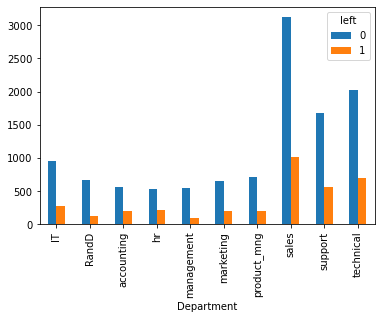

In [84]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [86]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [92]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [91]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [90]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [93]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [94]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [95]:
y = df.left

In [96]:
y.shape

(14999,)

In [97]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

[       satisfaction_level
 11124                0.29
 1655                 0.09
 2393                 0.33
 198                  0.10
 9636                 0.68
 ...                   ...
 14178                0.82
 6378                 0.67
 12070                0.74
 10633                0.19
 1520                 0.38
 
 [11999 rows x 1 columns],
        satisfaction_level
 6606                 0.63
 350                  0.09
 949                  0.11
 11275                0.56
 2144                 0.96
 ...                   ...
 8550                 0.99
 12660                0.44
 9066                 0.66
 9459                 0.65
 11274                0.48
 
 [3000 rows x 1 columns],
 11124    0
 1655     1
 2393     0
 198      1
 9636     0
         ..
 14178    0
 6378     0
 12070    1
 10633    0
 1520     1
 Name: left, Length: 11999, dtype: int64,
 6606     0
 350      1
 949      1
 11275    0
 2144     0
         ..
 8550     0
 12660    1
 9066     0
 9459     0
 

In [64]:
X_train, X_test , Y_train , Y_test = train_test_split(df[['satisfaction_level']],df.left,test_size=0.2)


In [65]:
X_test

,satisfaction_level
3755,0.95
2350,0.83
5434,0.61
11760,0.32
10097,0.15
...,...
3143,0.81
12573,0.36
12848,0.50
8804,0.78


In [66]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [67]:
X_train.shape

(11999, 1)

In [68]:
Y_train.shape

(11999,)

In [69]:
model.fit(X_train,Y_train)

LogisticRegression()

In [70]:
X_test

,satisfaction_level
3755,0.95
2350,0.83
5434,0.61
11760,0.32
10097,0.15
...,...
3143,0.81
12573,0.36
12848,0.50
8804,0.78


In [71]:
y_predicted= model.predict(X_test)

In [72]:
model.predict_proba(X_test)

array([[0.93433581, 0.06566419],
       [0.89992488, 0.10007512],
       [0.79496025, 0.20503975],
       ...,
       [0.71797464, 0.28202536],
       [0.88134042, 0.11865958],
       [0.88528169, 0.11471831]])

In [73]:
model.score(X_test,Y_test)

0.7746666666666666

In [74]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)